# Create figures in the Py-Feat paper.

*Written by Jin Hyun Cheong*

In [ ]:
!pip install -q py-feat

In [7]:
%config InlineBackend.figure_format = 'retina'


## Figure 1

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/RF_568.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/ResMaskNet_Z_resmasking_dropout1_rot30

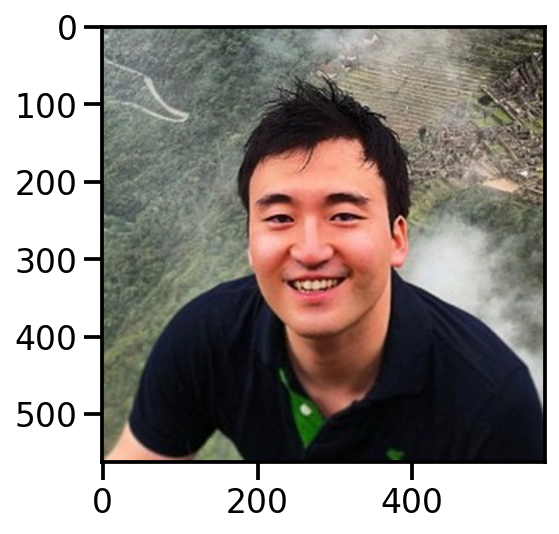

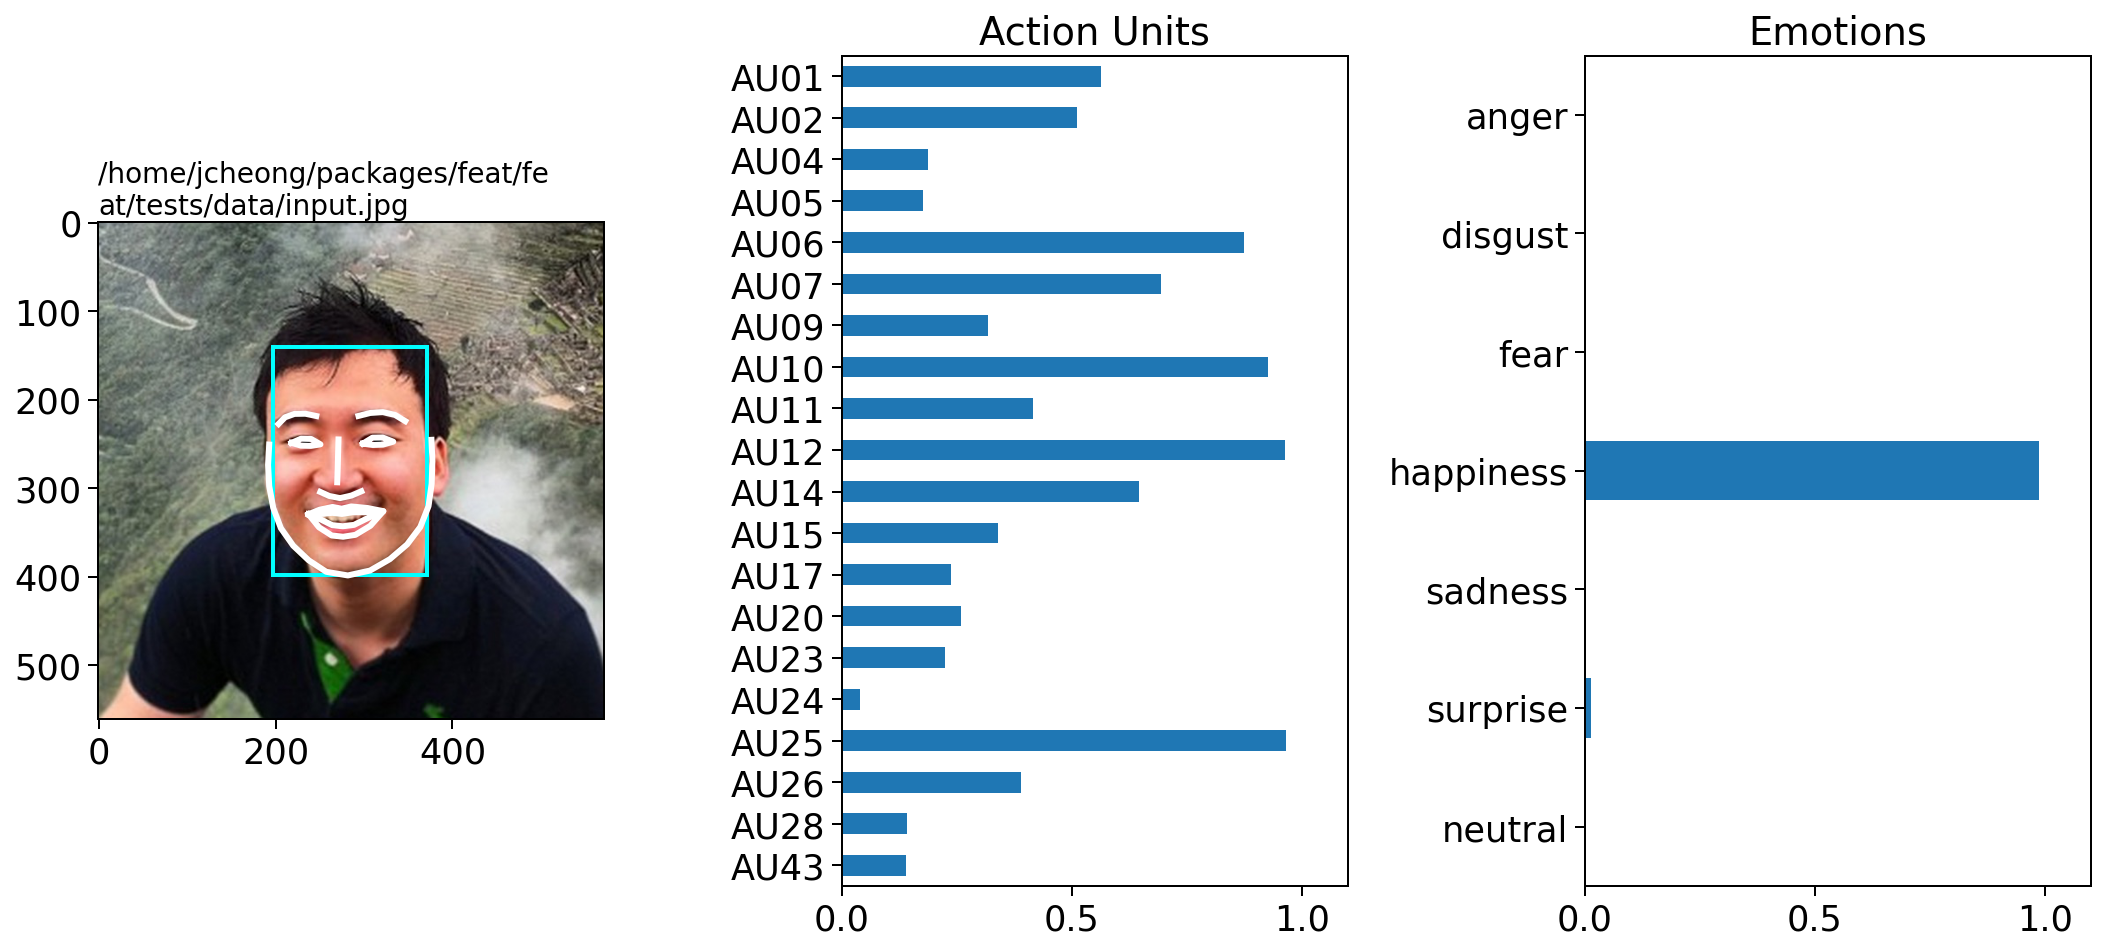

<AxesSubplot:>

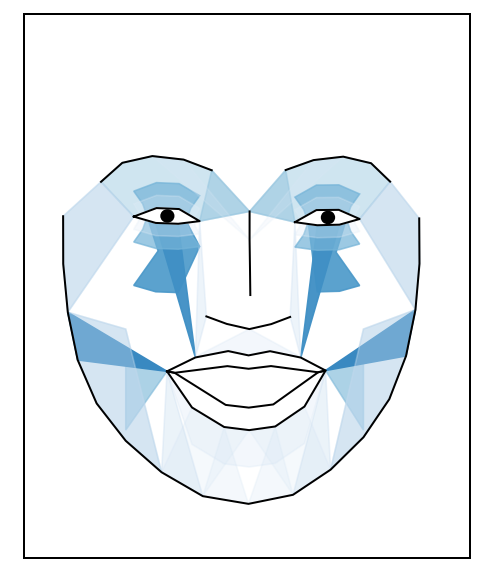

In [165]:
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os
test_data_dir = get_test_data_path()
test_image = os.path.join(test_data_dir, "input.jpg")

from PIL import Image
import matplotlib.pyplot as plt
f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im)

image_prediction = detector.detect_image(test_image)

image_prediction.plot_detections()

image_prediction.detector = "feat"
image_prediction.plot_aus(row_n=0, muscles = {'all': 'heatmap'})

<AxesSubplot:>

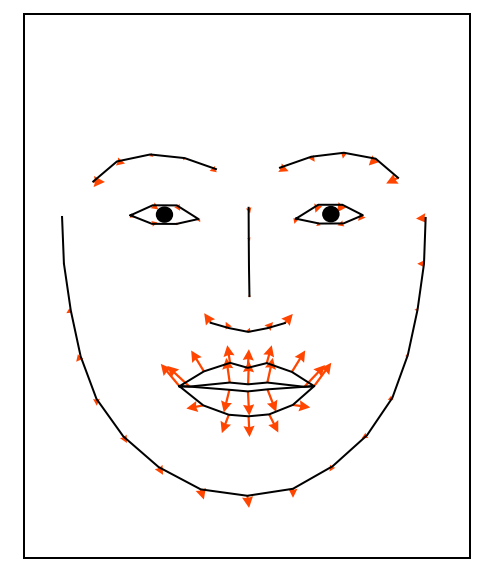

In [177]:
from feat.plotting import plot_face, predict
import numpy as np, seaborn as sns

image_prediction.detector = "feat"
feats = [
        "AU01",
        "AU02",
        "AU04",
        "AU05",
        "AU06",
        "AU07",
        "AU09",
        "AU10",
        "AU12",
        "AU14",
        "AU15",
        "AU17",
        "AU18",
        "AU20",
        "AU23",
        "AU24",
        "AU25",
        "AU26",
        "AU28",
        "AU43",
        ]
au = []
row_n = 0
for feat in feats:
    if feat=="AU18":
        au.append(0)
    else:
        aun = image_prediction[feat]
        au.append(aun.copy()[row_n])

neutral = predict(np.zeros(len(au)))
vectors = {'target': predict(1.5*np.array(au)), 'reference':  neutral, 
           'color': 'orangered', "headlength": 5, "headwidth": 5, "width":.005}
plot_face(au=np.zeros(20), vectorfield=vectors)

In [191]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os, glob
test_data_dir = get_test_data_path()
test_video = os.path.join(test_data_dir, "WolfgangLanger_Pexels.mp4")
video_prediction = detector.detect_video(test_video)

exception occurred


In [ ]:
import seaborn as sns
from natsort import natsorted
import numpy as np

video_prediction.sampling_freq = 24
wavelets = video_prediction.aus().dropna().extract_multi_wavelet(min_freq = 0.06, bank=10,
                                                                 max_freq = .2, mode="filtered")
wavelets.columns = [col.split("_")[-1] + "_" + col.split("_")[0]  for col in wavelets.columns]
wavelets = wavelets[np.sort(wavelets.columns)]

sns.set_style("white")
newcols = [] 
for col in wavelets.columns:
    if "AU01" not in col and "AU02" not in col and "AU04" not in col and "AU05" not in col and "AU09" not in col and "AU11" not in col and "AU43" not in col:
    newcols.append(col)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(wavelets[newcols].T, cmap = 'RdBu_r', cbar=False, 
            xticklabels=False, yticklabels=False)
ax.set(xlabel = "", ylabel = "")

## Figure 2

In [4]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")

clip_attrs = pd.read_csv("clip_attrs.csv")
videos = np.sort(glob.glob("*.mp4"))

from feat.utils import read_feat
import pandas as pd

for ix ,video in enumerate(videos):
    outputF = video.replace(".mp4", ".csv")
    if ix == 0: 
        fex = read_feat(outputF)
    else:
        fex = pd.concat([fex, read_feat(outputF)])
fex = fex.dropna()

# Load in conditions
clip_attrs = pd.read_csv("clip_attrs.csv")
clip_attrs = clip_attrs.assign(input = clip_attrs.clipN.apply(lambda x: str(x).zfill(3)+".mp4"),
                               condition = clip_attrs['class'].replace({"gn":"goodNews", "ists":"badNews"}))
input_class_map = dict(zip(clip_attrs.input, clip_attrs['condition']))
clip_attrs.head()

,clipN,class,phraseN,phrase_txt,input,condition
0,1,gn,1,your loan has been approved,001.mp4,goodNews
1,2,gn,2,you've got the job,002.mp4,goodNews
2,3,gn,3,the vendor has accepted your offer,003.mp4,goodNews
3,4,gn,4,your tests have come back clear,004.mp4,goodNews
4,5,gn,5,your application has been accepted,005.mp4,goodNews


,mean_AU01,mean_AU02,mean_AU04,mean_AU05,mean_AU06,mean_AU07,mean_AU09,mean_AU10,mean_AU11,mean_AU12,...,mean_y_61,mean_y_62,mean_y_63,mean_y_64,mean_y_65,mean_y_66,mean_y_67,mean_y_7,mean_y_8,mean_y_9
001.mp4,0.367902,0.304953,0.217278,0.247205,0.529641,0.546710,0.127434,0.689482,0.405150,0.757060,...,694.305659,696.236139,692.150659,682.592831,696.408174,700.882806,699.187324,814.856982,819.742603,808.427911
002.mp4,0.384290,0.372414,0.218073,0.238233,0.466245,0.568260,0.139705,0.645774,0.406103,0.665162,...,686.464658,688.592334,685.344299,677.572549,688.540245,692.234408,690.349490,806.882534,812.669819,802.669351
003.mp4,0.475926,0.435061,0.193346,0.235034,0.628517,0.614398,0.130048,0.758156,0.406965,0.822223,...,678.527397,681.056783,677.828855,672.959971,688.190226,691.792301,689.539840,803.369594,810.371285,800.508759
004.mp4,0.465396,0.431265,0.215378,0.136780,0.719656,0.712953,0.195271,0.852897,0.413281,0.888342,...,682.179613,684.565805,680.513723,674.068777,694.367983,698.833575,696.740101,811.564575,817.511093,806.248735
005.mp4,0.358873,0.346983,0.196898,0.132950,0.729992,0.724506,0.230352,0.844839,0.421897,0.883427,...,701.603967,703.849507,699.122215,687.917109,711.293560,716.390717,714.357210,827.466633,833.453529,821.740933


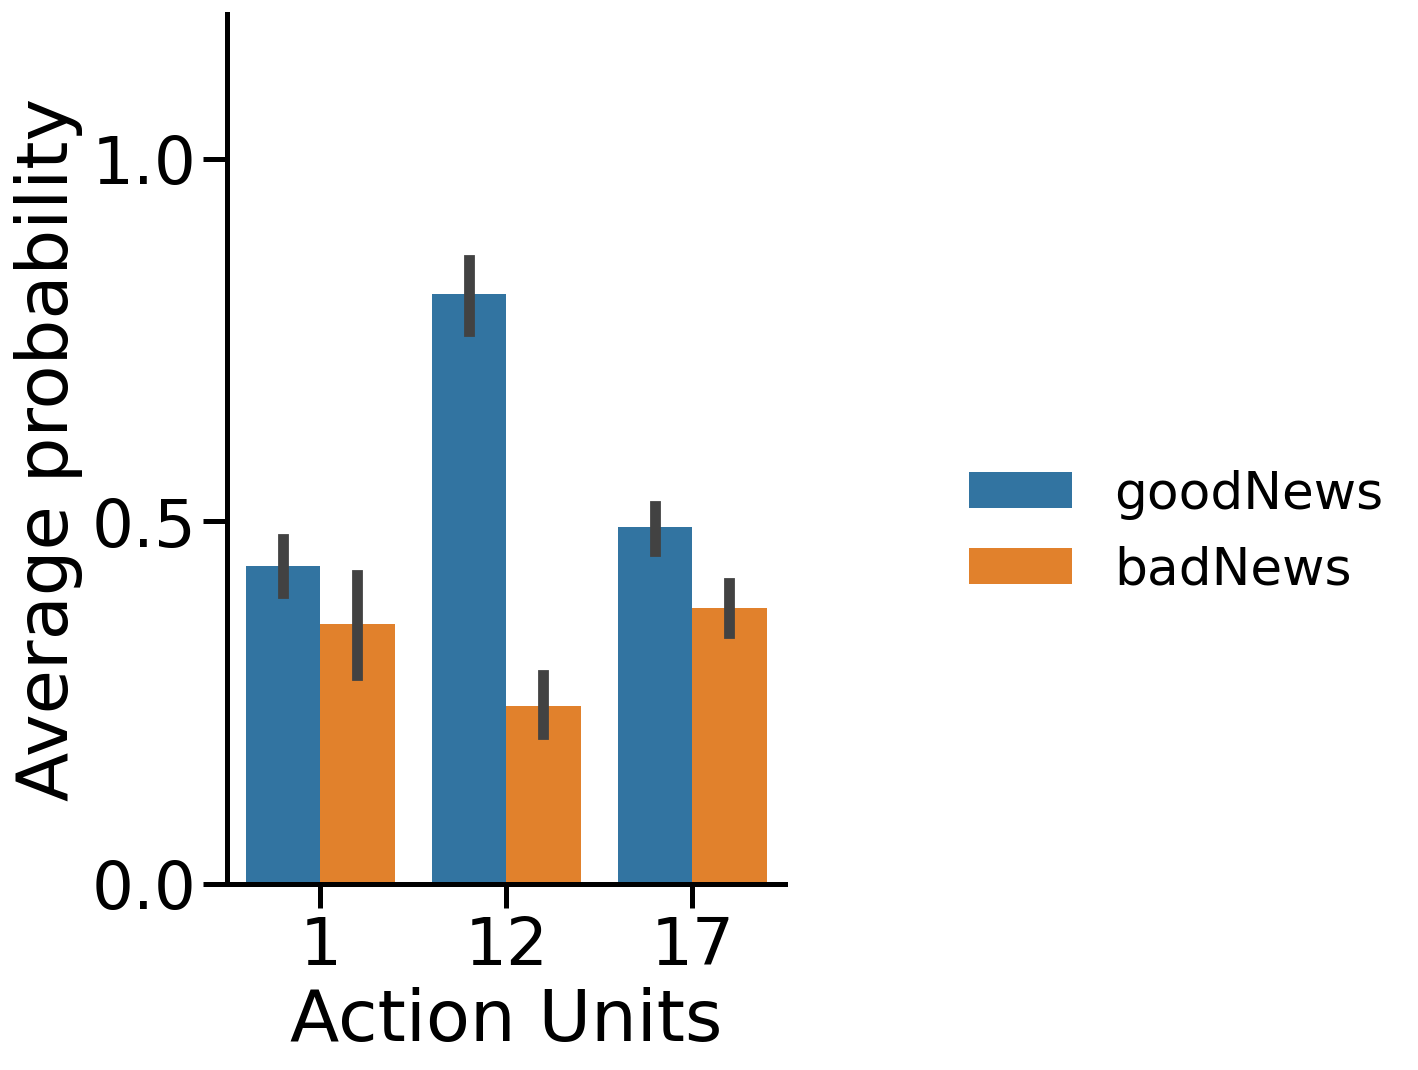

In [8]:
# Extract conditions between the two condtiiosn (gn: good news, ists: bad news)
conditions = dict(zip(clip_attrs.input, clip_attrs['condition']))
fex.sessions = fex.sessions = fex.input()
average_au_intensity_per_video = fex.extract_mean()

display(average_au_intensity_per_video.head())
average_au_intensity_per_video.sessions = average_au_intensity_per_video.index.map(input_class_map)
fig_df = average_au_intensity_per_video.reset_index()[["index", "mean_AU01", "mean_AU12","mean_AU17"]]
fig_df.columns = ['index', '1', '12', '17']
fig_df = fig_df.melt(id_vars="index", 
                       value_vars= ['1', '12', '17'],
                       var_name = "Action Units",
                       value_name = "Average probability")
fig_df = fig_df.assign(condition=fig_df['index'].map(input_class_map))

with sns.plotting_context("poster", font_scale=1.5):
    f,ax = plt.subplots(figsize=(5,8))
    sns.barplot(x="Action Units", y="Average probability", data=fig_df, hue='condition', ax=ax)
    ax.set(ylim=[0,1.2], yticks=[0, .5, 1.], ylabel="Average probability")
    sns.despine()
plt.legend(bbox_to_anchor=(1.7, .5), loc=9, borderaxespad=0., ncol=1, fontsize="x-large", frameon=False)

In [183]:
from sklearn.linear_model import LogisticRegression

from numpy.random import default_rng
average_au_intensity_per_video
ys = np.array(["goodNews"]*10 + ["badNews"]*10)
ys = pd.DataFrame({"y": ys}, index = average_au_intensity_per_video.index)

rng = default_rng(1)
goodNewsIdx = list(average_au_intensity_per_video.index[:10])
rng.shuffle(goodNewsIdx)
badNewsIdx = list(average_au_intensity_per_video.index[10:])
rng.shuffle(badNewsIdx)

scores = []
clfs = []
for rowix, row in average_au_intensity_per_video.iterrows():
    trainX = average_au_intensity_per_video.query("index!=@rowix")
    trainY = ys.query("index!=@rowix").values.ravel()

    testX = average_au_intensity_per_video.query("index==@rowix")
    testY = ys.query("index==@rowix").values.ravel()

    clf = trainX.predict(X = trainX.au_columns, y = trainY, model = LogisticRegression, penalty="none")
    scores.append(clf.score(testX.aus(), testY))
    clfs.append(clf.coef_[0])

clf = average_au_intensity_per_video.predict(average_au_intensity_per_video.au_columns, 
                                             ys.values.ravel(), 
                                             model = LogisticRegression, penalty="none")
print("scores:", scores)
print(f"coefficients for predicting class: {clf.classes_[1]}")
display(pd.DataFrame(clf.coef_, columns = fex.aus().columns))

scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
coefficients for predicting class: goodNews


,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,-3.015825,-2.218453,-4.123036,-14.848985,13.295041,7.635223,3.481937,9.63488,-3.534334,16.668575,-3.263449,3.498912,3.299766,0.286058,-1.400381,-7.996929,1.241669,0.736183,-0.702179,1.783518


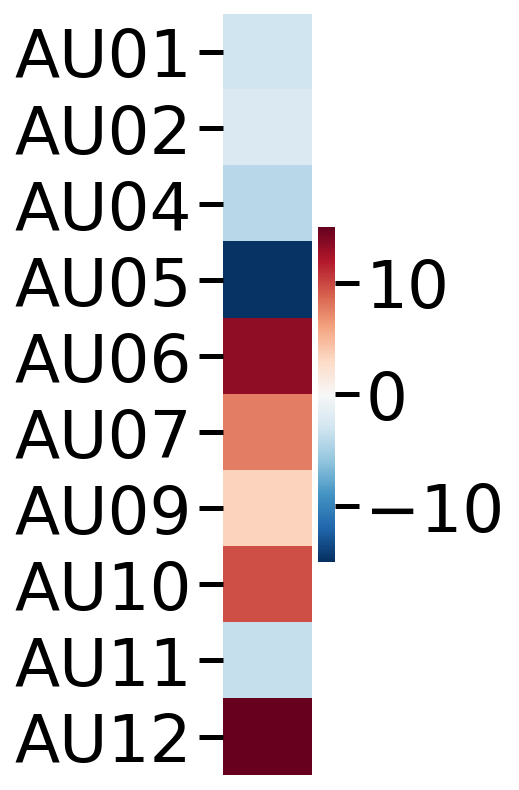

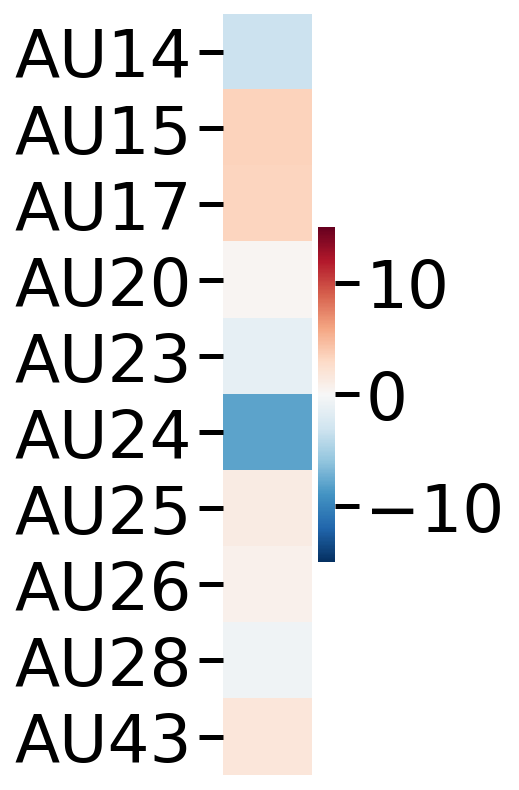

In [185]:
coefdf = pd.DataFrame(clf.coef_, columns = fex.aus().columns).T
with sns.plotting_context("poster", font_scale=1.5):
    f,ax= plt.subplots(figsize=(1,7))
    sns.heatmap(coefdf[:10], 
                center=0, cmap="RdBu_r", annot=False, xticklabels=False, vmin=-15, vmax=15)
    f,ax= plt.subplots(figsize=(1,7))
    sns.heatmap(coefdf[10:], 
                center=0, cmap="RdBu_r", annot=False, xticklabels=False, vmin=-15, vmax=15)

<AxesSubplot:>

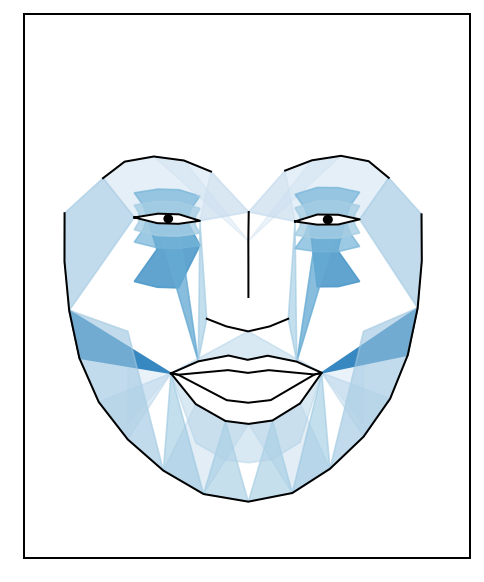

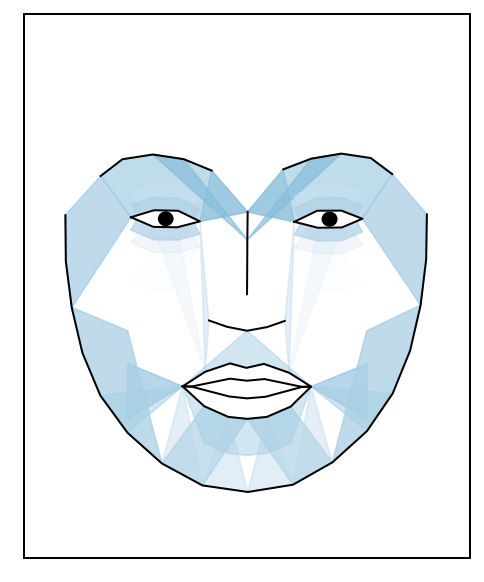

In [188]:
from feat import Fex
aus = Fex(pd.DataFrame(clf.coef_, columns = fex.aus().columns), 
          au_columns = fex.aus().columns,
         detector="feat")
aus.plot_aus(0, feature_range=(0,1), muscles = {'all': 'heatmap'})

aus = Fex(pd.DataFrame(-clf.coef_, columns = fex.aus().columns), 
          au_columns = fex.aus().columns,
         detector="feat")
aus.plot_aus(0, feature_range=(0,1), muscles = {'all': 'heatmap'})

## Figure 1 Analysis plots

T-test between goodNews vs badNews: t=17, p=2.32e-12


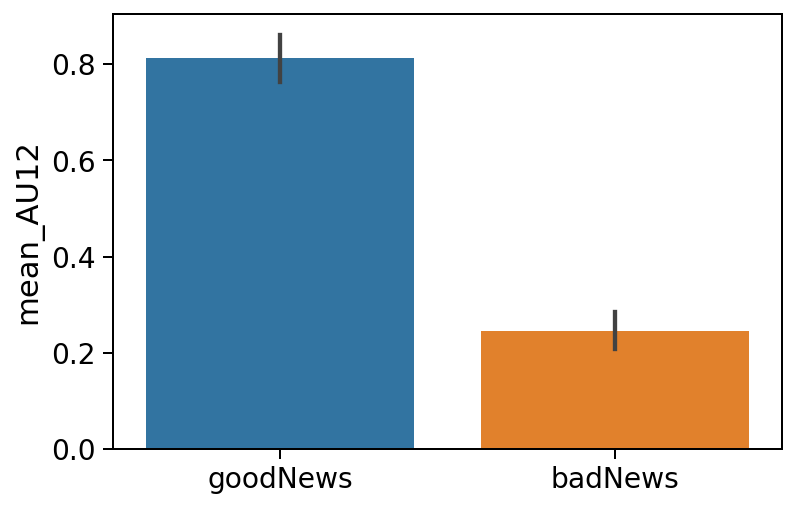

In [195]:
columns2compare = "mean_AU12"
sessions = ("goodNews", "badNews")
t, p = average_au_intensity_per_video.ttest_ind(col = columns2compare, sessions=sessions)
print(f"T-test between {sessions[0]} vs {sessions[1]}: t={t:.2g}, p={p:.3g}")
sns.barplot(x = average_au_intensity_per_video.sessions, 
            y = columns2compare, 
            data = average_au_intensity_per_video);

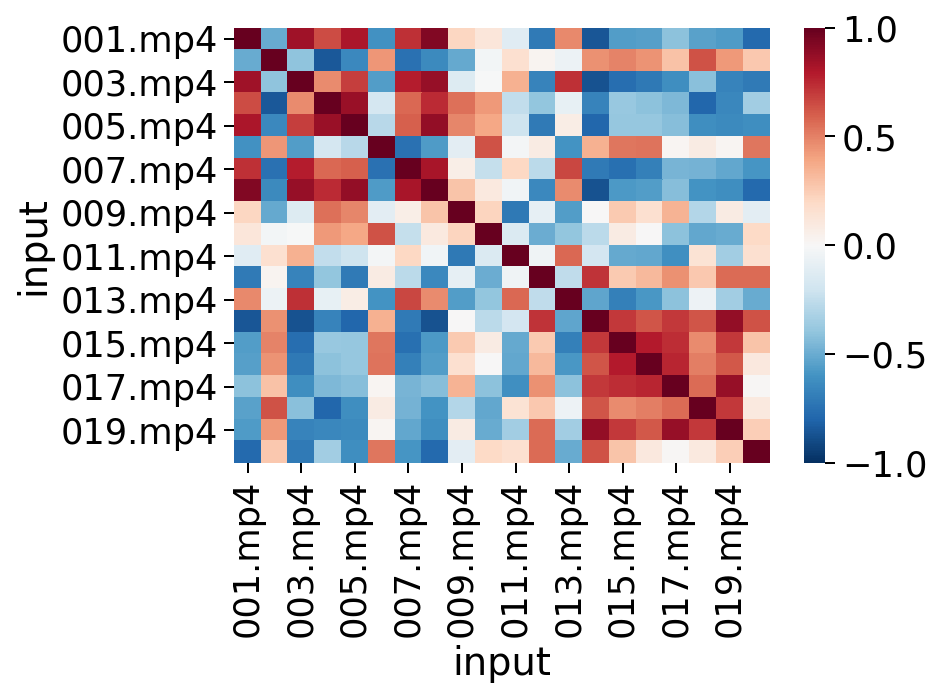

In [189]:
fex.sessions = fex.input()
isc = fex.isc(col = "AU01")
sns.heatmap(isc.corr(), center=0, vmin=-1, vmax=1, cmap="RdBu_r");

## Figure 3

Text(0.5, 1.0, 'AU43: Eye closer')

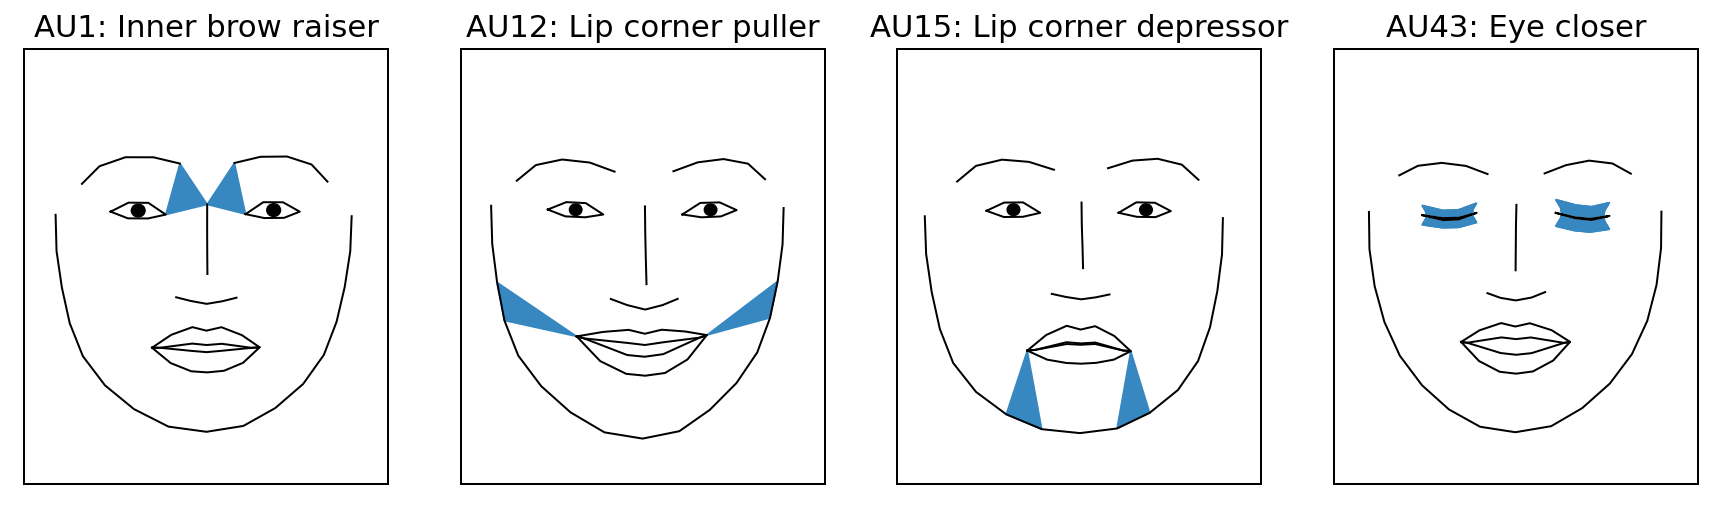

In [193]:
intensity = 2
feature_range = (0,2)

f,axes = plt.subplots(1, 4, figsize=(15,4))
ax = axes[0]
import seaborn as sns
sns.set_context("paper", font_scale=1.6)
# Add data, AU is ordered as such: 
# AU 1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 18, 20, 23, 24, 25, 26, 28, 43

# Activate AU1: Inner brow raiser 
au = np.array([intensity, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
vectors = {'target': predict(au, feature_range=feature_range),
           'reference':  neutral, 'color': 'blue',
          'color': 'orangered', "headlength": 5, "headwidth": 5, "width":.005}

plot_face(model=None, vectorfield = None, muscles = {'all': 'heatmap'}, feature_range=feature_range,
          ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-')
ax.set_title("AU1: Inner brow raiser")

ax = axes[1]
au = np.array([0, 0, 0, 0, 0, 0, 0, 0, intensity, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
vectors = {'target': predict(au, feature_range=feature_range),
           'reference':  neutral, 'color': 'blue',
          'color': 'orangered', "headlength": 5, "headwidth": 5, "width":.005}

plot_face(model=None, vectorfield = None, muscles = {'all': 'heatmap'},feature_range=feature_range,
          ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-')
ax.set_title("AU12: Lip corner puller")

ax = axes[2]
au = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, intensity, 0, 0, 0, 0, 0, 0, 0, 0, 0])
vectors = {'target': predict(au, feature_range=feature_range),
           'reference':  neutral, 'color': 'blue',
          'color': 'orangered', "headlength": 5, "headwidth": 5, "width":.005}
plot_face(model=None, vectorfield = None, muscles = {'all': 'heatmap'},feature_range=feature_range,
          ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-')
ax.set_title("AU15: Lip corner depressor")

ax = axes[3]
au = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, intensity])
vectors = {'target': predict(au, feature_range=feature_range),
           'reference':  neutral, 'color': 'blue',
          'color': 'orangered', "headlength": 5, "headwidth": 5, "width":.005}

plot_face(model=None, vectorfield = None, muscles = {'all': 'heatmap'},feature_range=feature_range,
          ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-')
ax.set_title("AU43: Eye closer")

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/RF_568.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/jcheong/packages/feat/feat/resources/ResMaskNet_Z_resmasking_dropout1_rot30

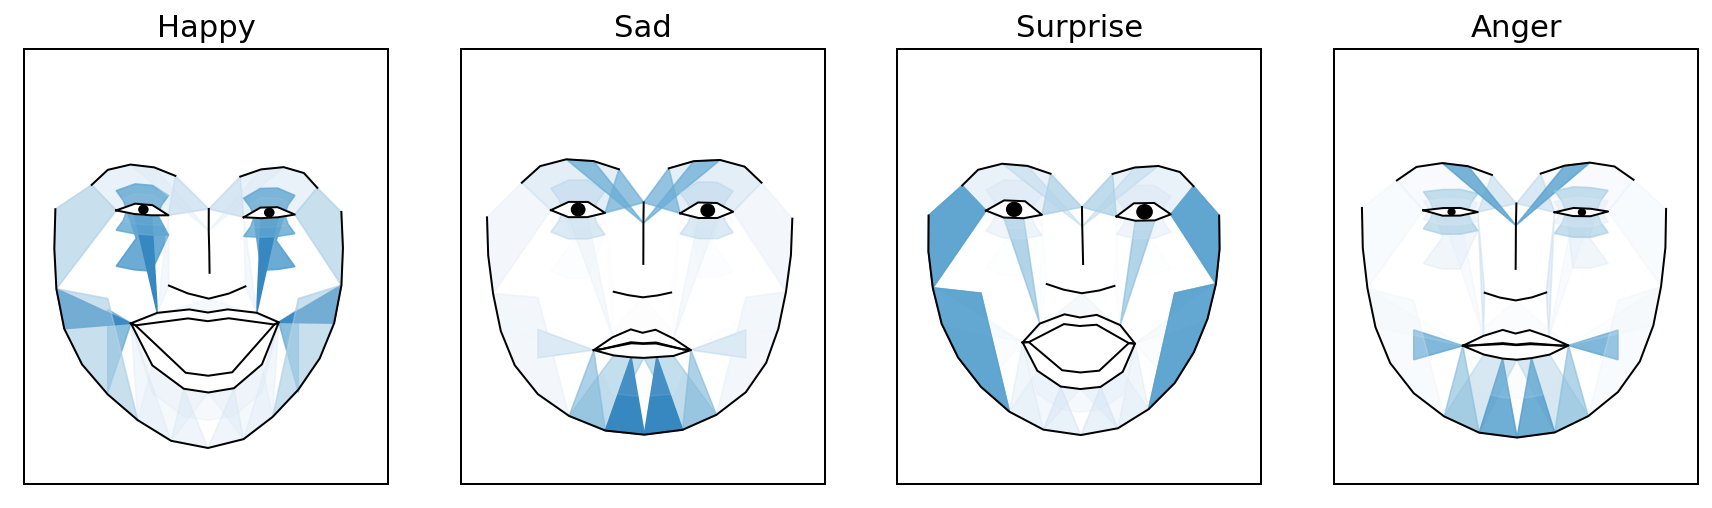

In [194]:
from feat import Detector
from feat.plotting import plot_face, predict
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
detector = Detector()
aus = [1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 18, 20, 23, 24, 25, 26, 28, 43]
aulist = [f"AU"+str(au).zfill(2) for au in aus]

au = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
neutral = predict(np.zeros(len(au)))

# happy
imgfile = "/Storage/Data/CK+/cohn-kanade-images/S010/006/S010_006_00000008.png"
img = Image.open(imgfile)
out = detector.detect_image(imgfile)
happyau = out.aus().assign(AU18=0)[aulist].values[0]

# sadness
imgfile = "/Storage/Data/CK+/cohn-kanade-images/S011/002/S011_002_00000008.png"
out = detector.detect_image(imgfile)
sadau = out.aus().assign(AU18=0)[aulist].values[0]

# surprise
imgfile = "/Storage/Data/CK+/cohn-kanade-images/S010/002/S010_002_00000008.png"
out = detector.detect_image(imgfile)
surpriseau = out.aus().assign(AU18=0)[aulist].values[0]

# fear
imgfile = "/Storage/Data/CK+/cohn-kanade-images/S011/003/S011_003_00000008.png"
out = detector.detect_image(imgfile)
fearau = out.aus().assign(AU18=0)[aulist].values[0]

#disgust 
imgfile = "/Storage/Data/CK+/cohn-kanade-images/S005/001/S005_001_00000008.png"
out = detector.detect_image(imgfile)
disgustau = out.aus().assign(AU18=0)[aulist].values[0]

# anger
imgfile = "/Storage/Data/CK+/cohn-kanade-images/S010/004/S010_004_00000012.png"
out = detector.detect_image(imgfile)
angerau = out.aus().assign(AU18=0)[aulist].values[0]

f,axes = plt.subplots(1, 4, figsize=(15,4))
titles = ['Happy', "Sad", "Surprise", "Anger"]
for ix, au in enumerate([happyau, sadau, surpriseau, angerau]):
    ax = axes[ix]
    vectors = {'target': predict(au),
               'reference':  neutral, 
              'color': 'orangered', "headlength": 5, "headwidth": 5, "width":.005}
    plot_face(model=None, vectorfield = None, muscles = {'all': 'heatmap'},
              ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-', feature_range=(0,2))
    ax.set(title = titles[ix])